In [96]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import regex as re

In [120]:
nba = pd.read_csv("nba.csv")
nba#.head()

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children
0,1,1002.5,4,27,4,77,2867,1,0,0,16,4,5,19.0,0,37.23,1,0
1,1,2030.0,5,28,4,78,2789,1,0,0,13,3,9,28.0,0,35.76,1,1
2,0,650.0,1,25,4,74,1149,0,0,1,6,3,0,19.0,0,15.53,1,0
3,0,2030.0,5,28,4,47,1178,0,1,0,7,5,2,1.0,0,25.06,1,0
4,0,755.0,3,24,4,82,2096,1,0,0,11,4,3,24.0,0,25.56,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,3210.0,7,29,4,79,2638,1,0,0,20,3,3,11.0,1,33.39,1,0
265,1,715.0,5,31,4,75,1084,0,1,0,5,3,1,54.0,0,14.45,1,1
266,1,600.0,11,33,3,67,1197,1,0,0,10,2,2,4.0,0,17.87,1,1
267,0,2500.0,6,28,4,78,2113,0,0,1,16,6,2,2.0,0,27.09,0,0


In [223]:
# Q1a

def ttest(df_name, string):
    if "ttest" in string and "by(" in string:
        eq_var = True
        nan_pol = 'propagate'
        df = eval(df_name)
        
        string = string.replace("ttest ", "")
        catvar_split = string.split("(")
        catvar = catvar_split[-1].split(")")[0]
        if catvar_split[-1].split(")")[1].strip() == 'unequal':
            eq_var = False
        catvar_split[0] = "(".join(catvar_split[:-1])
        var = catvar_split[0].split(",")[0]
        if 'if !missing' in var:
            var = var.split(" ")[0]
            nan_pol = 'omit'
        
        catvar_vals = np.unique(df[catvar])
        if len(catvar_vals) != 2:
            raise ValueError(f"The categorical variable ({catvar}) doesn't have 2 groups")
        
        df_1 = df[df[catvar] == catvar_vals[0]]
        df_2 = df[df[catvar] == catvar_vals[1]]
        
        ttest_1a = stats.ttest_ind(df_1[var], df_2[var], equal_var=eq_var, nan_policy=nan_pol)

        tstat_1a = ttest_1a.statistic
        pval_1a = ttest_1a.pvalue

        print("t-stat: {}".format(tstat_1a))
        print("p-value: {}".format(pval_1a))

In [218]:
ttest("nba", "ttest wage, by(guard)")

t-stat: 2.0530342128806582
p-value: 0.041043637620105405


In [219]:
ttest("nba", "ttest wage, by(guard) unequal")

t-stat: 2.1432820571177977
p-value: 0.03299634994484977


In [296]:
# Q1c, 1e

def filter_gen(df_name, string):
    if string.startswith("gen"):
        string = string.replace("gen ", "")
        str_split = string.split("=",1)
        str_split = [x.strip() for x in str_split]
        new_col_name = str_split[0]
        if str_split[1].count("=")>0:
            if str_split[1].startswith("("):
                str_split[1] = str_split[1][1:-1]
            filter_split = str_split[1].split(" ", 1)
            new_string = f"{df_name}['{new_col_name}'] = {df_name}['{filter_split[0]}'] {filter_split[1]}"
            new_string_split = new_string.split(" = ", 1)
            df = eval(df_name)
            df[new_col_name] = eval(new_string_split[1])
            print(new_string)
            return df
        else:
            words_lst = re.findall(r'\w\w+',str_split[1])
            for word in words_lst:
                if word not in ['log']:
                    str_split[1] = str_split[1].replace(word, f"{df_name}['{word}']")
                else:
                    str_split[1] = str_split[1].replace(word, f"np.{word}")
            new_string = f"{df_name}['{new_col_name}'] = {str_split[1]}"
            print(new_string)
            df = eval(df_name)
            df[new_col_name] = eval(str_split[1])
            return df
            

In [297]:
filter_gen("nba","gen degree = (coll >= 4)")

nba['degree'] = nba['coll'] >= 4


,married,wage,exper,age,coll,games,minutes,guard,forward,center,...,assists,draft,allstar,avgmin,black,children,degree,productivity,index,payoff
0,1,1002.5,4,27,4,77,2867,1,0,0,...,5,19.0,0,37.23,1,0,True,0.429717,30,0.029925
1,1,2030.0,5,28,4,78,2789,1,0,0,...,9,28.0,0,35.76,1,1,True,0.363571,34,0.016749
2,0,650.0,1,25,4,74,1149,0,0,1,...,0,19.0,0,15.53,1,0,True,0.386423,9,0.013846
3,0,2030.0,5,28,4,47,1178,0,1,0,...,2,1.0,0,25.06,1,0,True,0.279287,16,0.007882
4,0,755.0,3,24,4,82,2096,1,0,0,...,3,24.0,0,25.56,1,0,True,0.430344,21,0.027815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,3210.0,7,29,4,79,2638,1,0,0,...,3,11.0,1,33.39,1,0,True,0.598939,29,0.009034
265,1,715.0,5,31,4,75,1084,0,1,0,...,1,54.0,0,14.45,1,1,True,0.345941,10,0.013986
266,1,600.0,11,33,3,67,1197,1,0,0,...,2,4.0,0,17.87,1,1,False,0.559733,16,0.026667
267,0,2500.0,6,28,4,78,2113,0,0,1,...,2,2.0,0,27.09,0,0,True,0.590629,26,0.010400


In [298]:
filter_gen("nba","gen productivity = points/(minutes/games)")

nba['productivity'] = nba['points']/(nba['minutes']/nba['games'])


,married,wage,exper,age,coll,games,minutes,guard,forward,center,...,assists,draft,allstar,avgmin,black,children,degree,productivity,index,payoff
0,1,1002.5,4,27,4,77,2867,1,0,0,...,5,19.0,0,37.23,1,0,True,0.429717,30,0.029925
1,1,2030.0,5,28,4,78,2789,1,0,0,...,9,28.0,0,35.76,1,1,True,0.363571,34,0.016749
2,0,650.0,1,25,4,74,1149,0,0,1,...,0,19.0,0,15.53,1,0,True,0.386423,9,0.013846
3,0,2030.0,5,28,4,47,1178,0,1,0,...,2,1.0,0,25.06,1,0,True,0.279287,16,0.007882
4,0,755.0,3,24,4,82,2096,1,0,0,...,3,24.0,0,25.56,1,0,True,0.430344,21,0.027815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,3210.0,7,29,4,79,2638,1,0,0,...,3,11.0,1,33.39,1,0,True,0.598939,29,0.009034
265,1,715.0,5,31,4,75,1084,0,1,0,...,1,54.0,0,14.45,1,1,True,0.345941,10,0.013986
266,1,600.0,11,33,3,67,1197,1,0,0,...,2,4.0,0,17.87,1,1,False,0.559733,16,0.026667
267,0,2500.0,6,28,4,78,2113,0,0,1,...,2,2.0,0,27.09,0,0,True,0.590629,26,0.010400


In [299]:
# Q1g

def corr(df_name, string):
    if string.startswith("pwcorr"):
        string = string.replace("pwcorr ", "")
        words_lst = re.findall(r'[a-zA-Z]+',string)
        df = eval(df_name)
        return df[words_lst].corr()

In [300]:
corr("nba","pwcorr points assists rebounds")

,points,assists,rebounds
points,1.000000,0.539269,0.563324
assists,0.539269,1.000000,0.059956
rebounds,0.563324,0.059956,1.000000


In [301]:
filter_gen("nba","gen index = points + rebounds + 2*assists")

nba['index'] = nba['points'] + nba['rebounds'] + 2*nba['assists']


,married,wage,exper,age,coll,games,minutes,guard,forward,center,...,assists,draft,allstar,avgmin,black,children,degree,productivity,index,payoff
0,1,1002.5,4,27,4,77,2867,1,0,0,...,5,19.0,0,37.23,1,0,True,0.429717,30,0.029925
1,1,2030.0,5,28,4,78,2789,1,0,0,...,9,28.0,0,35.76,1,1,True,0.363571,34,0.016749
2,0,650.0,1,25,4,74,1149,0,0,1,...,0,19.0,0,15.53,1,0,True,0.386423,9,0.013846
3,0,2030.0,5,28,4,47,1178,0,1,0,...,2,1.0,0,25.06,1,0,True,0.279287,16,0.007882
4,0,755.0,3,24,4,82,2096,1,0,0,...,3,24.0,0,25.56,1,0,True,0.430344,21,0.027815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,3210.0,7,29,4,79,2638,1,0,0,...,3,11.0,1,33.39,1,0,True,0.598939,29,0.009034
265,1,715.0,5,31,4,75,1084,0,1,0,...,1,54.0,0,14.45,1,1,True,0.345941,10,0.013986
266,1,600.0,11,33,3,67,1197,1,0,0,...,2,4.0,0,17.87,1,1,False,0.559733,16,0.026667
267,0,2500.0,6,28,4,78,2113,0,0,1,...,2,2.0,0,27.09,0,0,True,0.590629,26,0.010400


In [302]:
filter_gen("nba","gen payoff = index/wage")

nba['payoff'] = nba['index']/nba['wage']


,married,wage,exper,age,coll,games,minutes,guard,forward,center,...,assists,draft,allstar,avgmin,black,children,degree,productivity,index,payoff
0,1,1002.5,4,27,4,77,2867,1,0,0,...,5,19.0,0,37.23,1,0,True,0.429717,30,0.029925
1,1,2030.0,5,28,4,78,2789,1,0,0,...,9,28.0,0,35.76,1,1,True,0.363571,34,0.016749
2,0,650.0,1,25,4,74,1149,0,0,1,...,0,19.0,0,15.53,1,0,True,0.386423,9,0.013846
3,0,2030.0,5,28,4,47,1178,0,1,0,...,2,1.0,0,25.06,1,0,True,0.279287,16,0.007882
4,0,755.0,3,24,4,82,2096,1,0,0,...,3,24.0,0,25.56,1,0,True,0.430344,21,0.027815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,3210.0,7,29,4,79,2638,1,0,0,...,3,11.0,1,33.39,1,0,True,0.598939,29,0.009034
265,1,715.0,5,31,4,75,1084,0,1,0,...,1,54.0,0,14.45,1,1,True,0.345941,10,0.013986
266,1,600.0,11,33,3,67,1197,1,0,0,...,2,4.0,0,17.87,1,1,False,0.559733,16,0.026667
267,0,2500.0,6,28,4,78,2113,0,0,1,...,2,2.0,0,27.09,0,0,True,0.590629,26,0.010400


In [303]:
pollution = pd.read_csv("pollution.csv")
pollution.head()

,year,countryname,countrycode,gdp,gdppc,co2,co2pc,population,oecd
0,2010,Zambia,ZMB,9.799629e+09,741.4421,2427.554,0.183669,13216985,0.0
1,2010,French Polynesia,PYF,NaN,NaN,883.747,3.296764,268065,0.0
2,2010,Monaco,MCO,NaN,NaN,NaN,NaN,36845,0.0
3,2010,Ukraine,UKR,9.057726e+10,1974.6212,304804.720,6.644867,45870700,0.0
4,2010,"Venezuela, RB",VEN,1.750000e+11,6010.0270,201747.340,6.946437,29043283,0.0


In [304]:
ttest("pollution", "ttest co2pc if !missing(co2pc), by(oecd) unequal")

False omit
t-stat: -5.682465161974535
p-value: 2.683581293169394e-07


In [305]:
filter_gen("pollution","gen log_gdp = log(gdp)")
filter_gen("pollution","gen log_co2 = log(co2)")

pollution['log_gdp'] = np.log(pollution['gdp'])
pollution['log_co2'] = np.log(pollution['co2'])


,year,countryname,countrycode,gdp,gdppc,co2,co2pc,population,oecd,log_gdp,log_co2
0,2010,Zambia,ZMB,9.799629e+09,741.4421,2427.554,0.183669,13216985,0.0,23.005610,7.794639
1,2010,French Polynesia,PYF,NaN,NaN,883.747,3.296764,268065,0.0,NaN,6.784171
2,2010,Monaco,MCO,NaN,NaN,NaN,NaN,36845,0.0,NaN,NaN
3,2010,Ukraine,UKR,9.057726e+10,1974.6212,304804.720,6.644867,45870700,0.0,25.229469,12.627427
4,2010,"Venezuela, RB",VEN,1.750000e+11,6010.0270,201747.340,6.946437,29043283,0.0,25.888052,12.214771
...,...,...,...,...,...,...,...,...,...,...,...
209,2010,Estonia,EST,1.389725e+10,10369.8400,18338.668,13.683929,1340161,1.0,23.354957,9.816767
210,2010,United States,USA,1.360000e+13,43952.4450,5433056.500,17.564163,309326225,1.0,30.241091,15.508012
211,2010,Slovak Republic,SVK,7.689996e+10,14161.7980,36094.280,6.647076,5430099,1.0,25.065771,10.493890
212,2010,Finland,FIN,2.040000e+11,38064.6520,61843.953,11.530840,5363352,1.0,26.041386,11.032370


In [306]:
def scatter(df_name, string):
    if string.startswith("twoway"):
        string = string.replace("twoway (","")[:-2]
        command = string.split(",")[0].strip()
        customizations = string.split(",")[1].strip()
        df = eval(df_name)
        if command.startswith("scatter"):
            var_1 = command.split(" ")[1]
            var_2 = command.split(" ")[2]
            plt.scatter(df[var_1], df[var_2])
        customizations_split = customizations.split(")")
        for word in customizations_split:
            word = word.strip()
            if word.startswith("xtitle"):
                xtitle = word.split("(")[1]
                if xtitle.startswith("'"):
                    xtitle = xtitle[1:]
                if xtitle.endswith("'"):
                    xtitle = xtitle[:-1]
                plt.xlabel(xtitle)
            if word.startswith("ytitle"):
                ytitle = word.split("(")[1]
                if ytitle.startswith("'"):
                    ytitle = ytitle[1:]
                if ytitle.endswith("'"):
                    ytitle = ytitle[:-1]
                plt.ylabel(ytitle)

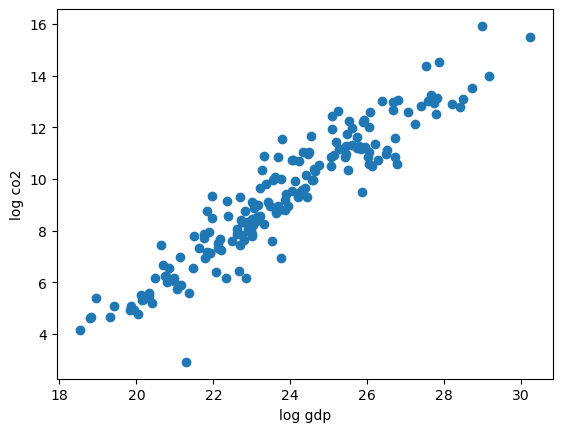

In [307]:
scatter("pollution","twoway (scatter log_gdp log_co2, xtitle('log gdp') ytitle('log co2'))")

In [311]:
def describe(df_name, string):
    if string.startswith('describe'):
        df = eval(df_name)
        return df.describe()

In [312]:
la = pd.read_csv("la.csv")
la.head()

,hispanic,citizen,black,exp,wage,female,education
0,1,1,0,14.0,5.288462,1,9
1,0,1,0,14.7,8.461538,1,13
2,0,1,0,14.7,10.416667,1,13
3,0,1,0,14.0,21.634615,1,14
4,1,0,0,12.0,3.365385,1,12


In [313]:
describe("la","describe")

,hispanic,citizen,black,exp,wage,female,education
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,0.367323,0.717265,0.088065,12.494044,13.413861,0.424102,12.864426
std,0.482355,0.450590,0.283554,1.605983,14.659279,0.494492,3.194241
min,0.000000,0.000000,0.000000,10.000000,1.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,11.000000,6.500000,0.000000,12.000000
50%,0.000000,1.000000,0.000000,12.700000,10.576923,0.000000,13.000000
75%,1.000000,1.000000,0.000000,14.000000,15.723952,1.000000,16.000000
max,1.000000,1.000000,1.000000,15.000000,250.661540,1.000000,20.000000


In [322]:
def hist(df_name, string):
    if string.startswith('histogram'):
        string = string.replace('histogram ','')
        str_split = string.split(", ")
        num_bins_change = False
        num_bins = 0
        for word in str_split:
            if word.startswith("bin"):
                num_bins_change = True
                num_bins = int(word.split("(")[1].split(")")[0])
        df = eval(df_name)
        if num_bins_change == False:
            return df.hist(column=str_split[0]);
        else:
            return df.hist(column=str_split[0],bins=num_bins);

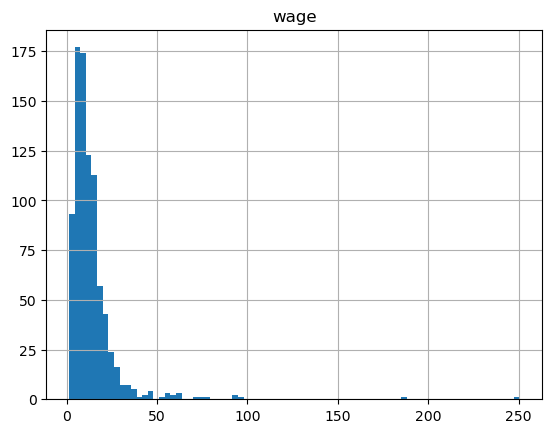

In [323]:
hist("la","histogram wage, bin(80)");